## sales prediction
develop a machine learning model that an acurately predict the sales based on input
## .supervised
## .regression

## import required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from IPython.display import Image
from six import StringIO
import pydotplus
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## loading the csv file

In [2]:
data=pd.read_csv("advertising.csv")

## inspect the data

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.tail

<bound method NDFrame.tail of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

## shape of the function

In [5]:
data.shape

(200, 4)

there a 200 rows and 4 columns

##  check for null values

In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

no null values

## check for duplicate values

In [7]:
data.duplicated().sum()

0

no duplicate values

## additional information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## linerity

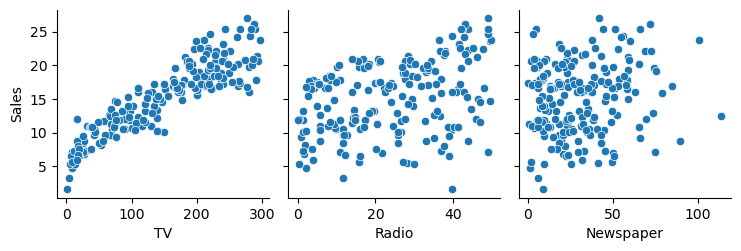

In [10]:
sn.pairplot(data,x_vars=["TV","Radio","Newspaper"],y_vars="Sales")
plt.show()

lineraity can only observed in TV

## normality
Q-Q plot

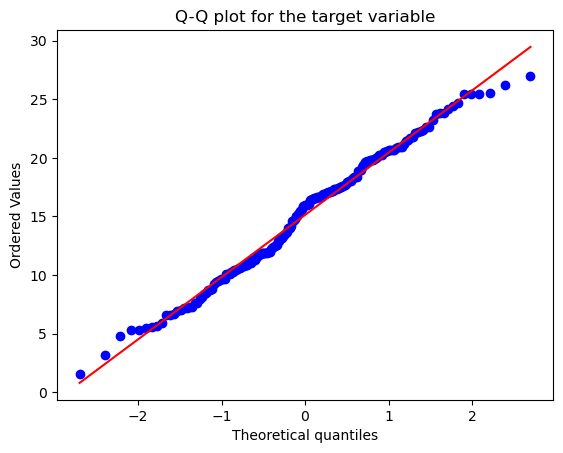

In [11]:
stats.probplot(data["Sales"],dist="norm",plot=plt)
plt.title('Q-Q plot for the target variable')
plt.show()

alomost all data points align in line

## shapiro wilk test

In [12]:
stat,p_value=stats.shapiro(data["Sales"])
print("Statistics=",stat)
print("p_value=",p_value)

Statistics= 0.98752361536026
p_value= 0.07643628120422363


the target is normal as stat value is close to one and p avlue is lose to 0.5

## multicollinearity

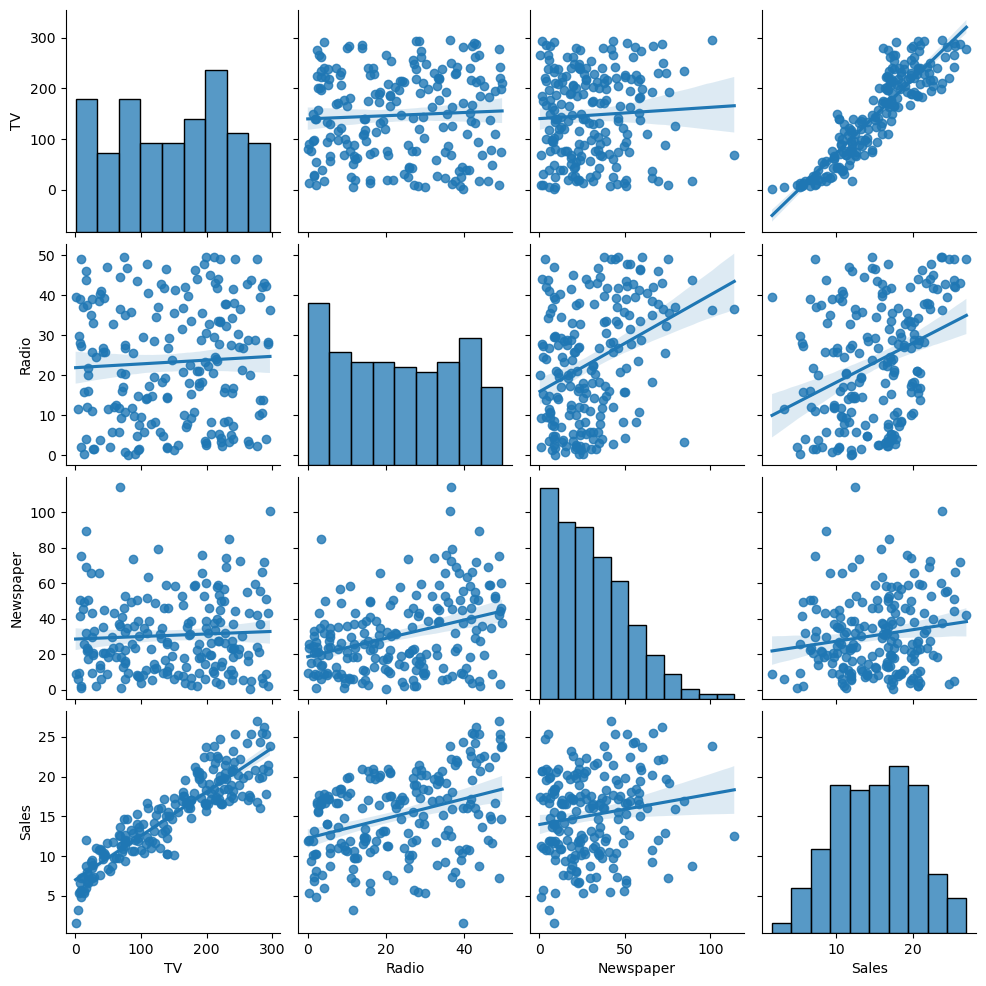

In [13]:
sn.pairplot(data,kind='reg')
plt.show()

## heatmap

<Axes: >

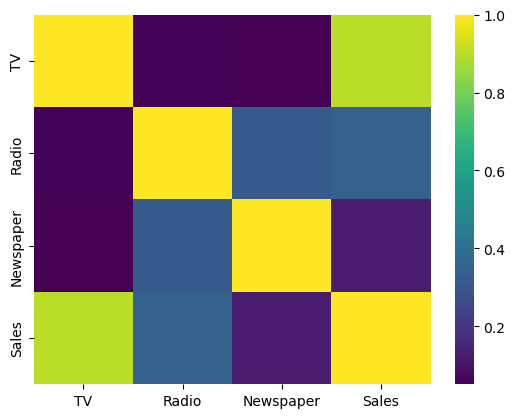

In [14]:
corr=data.corr(method='spearman')
sn.heatmap(corr,cmap="viridis")

-there is small multicollinearity

## check for outliers

<Axes: >

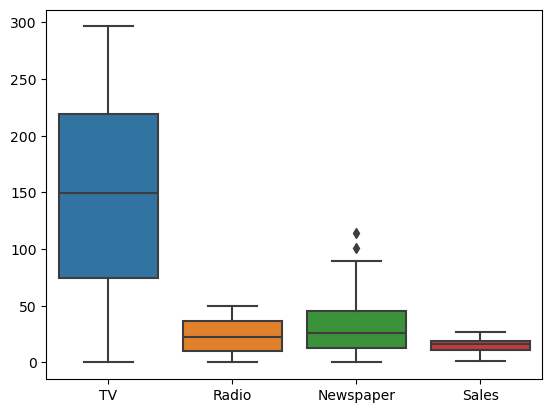

In [15]:
sn.boxplot(data)

two visible outlier points are there in newspaper column of data

## extract the features and target

In [16]:
x=data.iloc[:,:-1]
y=data.Sales

## split the data


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

## standardization of data

In [18]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

## model selection

## linear regression

## traing testing

In [19]:
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)
y_pred_lr=regressor.predict(x_test_scaled)

In [20]:
print(regressor.coef_[0])
print(regressor.intercept_)

4.463726489468847
15.101249999999999


regression equation Y=4.46x+15.1

## metric equation

In [21]:
mae_lr=mean_absolute_error(y_test,y_pred_lr)
mse_lr=mean_squared_error(y_test,y_pred_lr)
rmse_lr=np.sqrt(mse_lr)
r2_lr=r2_score(y_test,y_pred_lr)
print("MAE",mae_lr)
print("MSE",mse_lr)
print("RMSE",rmse_lr)
print("R2 Sore",r2_score,r2_lr)

MAE 1.8595135015543172
MSE 4.897577909774553
RMSE 2.213047200078334
R2 Sore <function r2_score at 0x000002459FFBC720> 0.8688979647947568


## error analysis

In [22]:
predictions_lr=pd.DataFrame()
predictions_lr['actual']= y_test
predictions_lr['predicted']=y_pred_lr
predictions_lr['residuals']=predictions_lr['actual']-predictions_lr['predicted']
predictions_lr.head()

,actual,predicted,residuals
150,16.1,20.555007,-4.455007
28,18.9,20.306550,-1.406550
13,13.7,11.052798,2.647202
178,16.8,19.122789,-2.322789
109,19.8,20.514673,-0.714673


## model evaluation

<Axes: xlabel='actual', ylabel='predicted'>

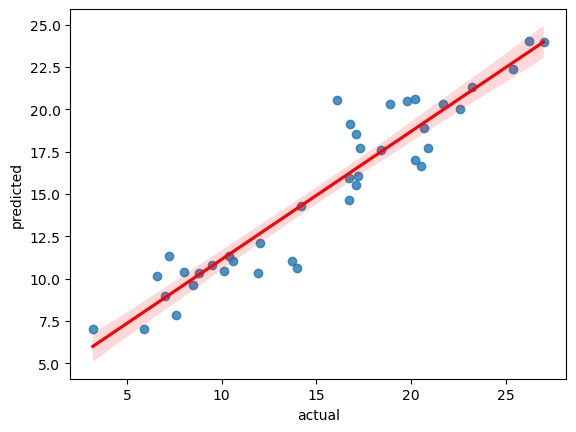

In [23]:
sn.regplot(x='actual',y='predicted',data=predictions_lr,line_kws={'color':'red'})

- most of the data points are closer to regrsssion line
- confidence interval:The shadow is narrow

## residual graph

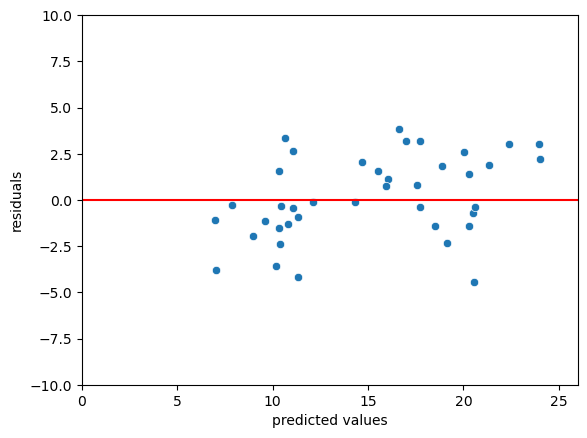

In [24]:
sn.scatterplot(x=predictions_lr['predicted'],y=predictions_lr['residuals'])
sn.lineplot(x=range(len(y)),y=[0]*len(y),color="red")
plt.ylim(-10,10)
plt.xlim(0,26)
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.show()

- the datapoints are spread apart from y=0 line therefore hetroscedascity

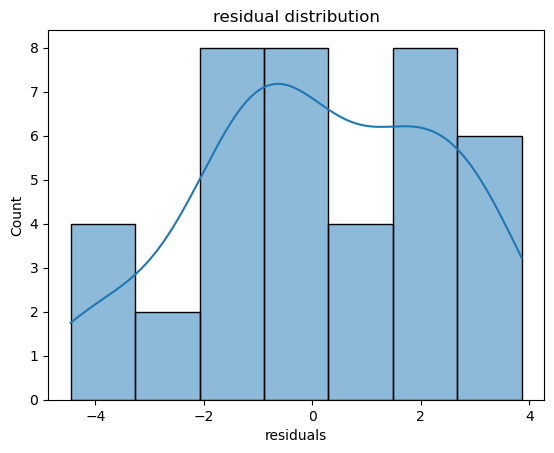

In [25]:
sn.histplot(predictions_lr['residuals'],kde=True)
plt.title("residual distribution")
plt.show()

## k nearest neighbor

## determine the k value

In [26]:
data.shape

(200, 4)

In [27]:
np.sqrt(200)

14.142135623730951

the closest integer is 14 therefore k=14

## training and testing

In [28]:
knn=KNeighborsRegressor(n_neighbors=14)
knn.fit(x_train_scaled,y_train)
y_pred_knn=knn.predict(x_test_scaled)

In [29]:
mae_knn=mean_absolute_error(y_test,y_pred_knn)
mse_knn=mean_squared_error(y_test,y_pred_knn)
rmse_knn=np.sqrt(mse_knn)
r2_knn=r2_score(y_test,y_pred_knn)
print("MAE",mae_knn)
print("MSE",mse_knn)
print("RMSE",rmse_knn)
print("R2 Sore",r2_score,r2_knn)

MAE 1.8478571428571429
MSE 5.687400510204081
RMSE 2.38482714472225
R2 Sore <function r2_score at 0x000002459FFBC720> 0.8477554016186305


## optimising knn using gridScearhCv

In [30]:
param_grid={'n_neighbors':[13,14,15,10,19,7,21],'metric':['euclidean','mahattan','minkowski','hamming','chebyshev']}

In [31]:
grid=GridSearchCV(estimator=knn,param_grid=param_grid,scoring='r2')
grid.fit(x_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsRegressor(n_neighbors=14),
             param_grid={'metric': ['euclidean', 'mahattan', 'minkowski',
                                    'hamming', 'chebyshev'],
                         'n_neighbors': [13, 14, 15, 10, 19, 7, 21]},
             scoring='r2')

In [32]:
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 7}


In [33]:
op_knn=KNeighborsRegressor(n_neighbors=grid.best_params_["n_neighbors"],metric=grid.best_params_["metric"])
op_knn.fit(x_train_scaled,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=7)

In [34]:
r2_knn_op=op_knn.score(x_test_scaled,y_test)
r2_knn_op

0.8779984204457576

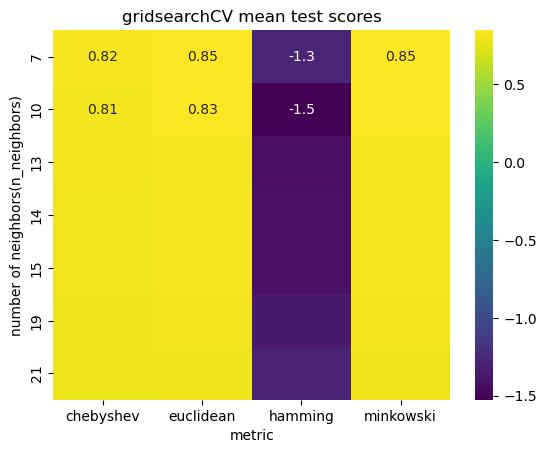

In [35]:
results=pd.DataFrame(grid.cv_results_)
pivot_table=results.pivot_table(values='mean_test_score',index='param_n_neighbors',columns='param_metric')
sn.heatmap(pivot_table,annot=True,cmap="viridis")
plt.title("gridsearchCV mean test scores")
plt.xlabel("metric")
plt.ylabel("number of neighbors(n_neighbors)")
plt.show()

## decision tree

In [36]:
tree=DecisionTreeRegressor()
tree.fit(x_train_scaled,y_train)
y_pred_dt=tree.predict(x_test_scaled)

## metric evaluation

In [37]:
mae_dt=mean_absolute_error(y_test,y_pred_dt)
mse_dt=mean_squared_error(y_test,y_pred_dt)
rmse_dt=np.sqrt(mse_dt)
r2_dt=r2_score(y_test,y_pred_dt)
print("MAE",mae_dt)
print("MSE",mse_dt)
print("RMSE",rmse_dt)
print("R2 Sore",r2_score,r2_dt)

MAE 1.6099999999999999
MSE 4.181499999999998
RMSE 2.0448716341130067
R2 Sore <function r2_score at 0x000002459FFBC720> 0.8880664748351171


## optimising the tree using gridsearchCV

In [40]:
param_grid = {
 'max_depth': [3, 5, 7, 9, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'absolute_error', 'friedman_mse']
}

grid = GridSearchCV(tree, param_grid, cv=5, scoring='r2')
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [3, 5, 7, 9, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [41]:
print(grid.best_params_)

{'criterion': 'squared_error', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [42]:
op_tree = DecisionTreeRegressor(max_depth = grid.best_params_['max_depth'],
 min_samples_split=grid.best_params_['min_samples_split'],
 min_samples_leaf=grid.best_params_['min_samples_leaf'],
 max_features=grid.best_params_['max_features'],
 criterion= grid.best_params_['criterion'] )
op_tree.fit(x_train_scaled, y_train)


DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=5)

In [43]:
r2_dt_op = op_tree.score(x_test_scaled, y_test)
print('R2 Score: ', r2_dt_op)

R2 Score:  0.8969236777041842


In [44]:
node_data = StringIO()
export_graphviz(op_tree, out_file= node_data)
graph = pydotplus.graph_from_dot_data(node_data.getvalue())

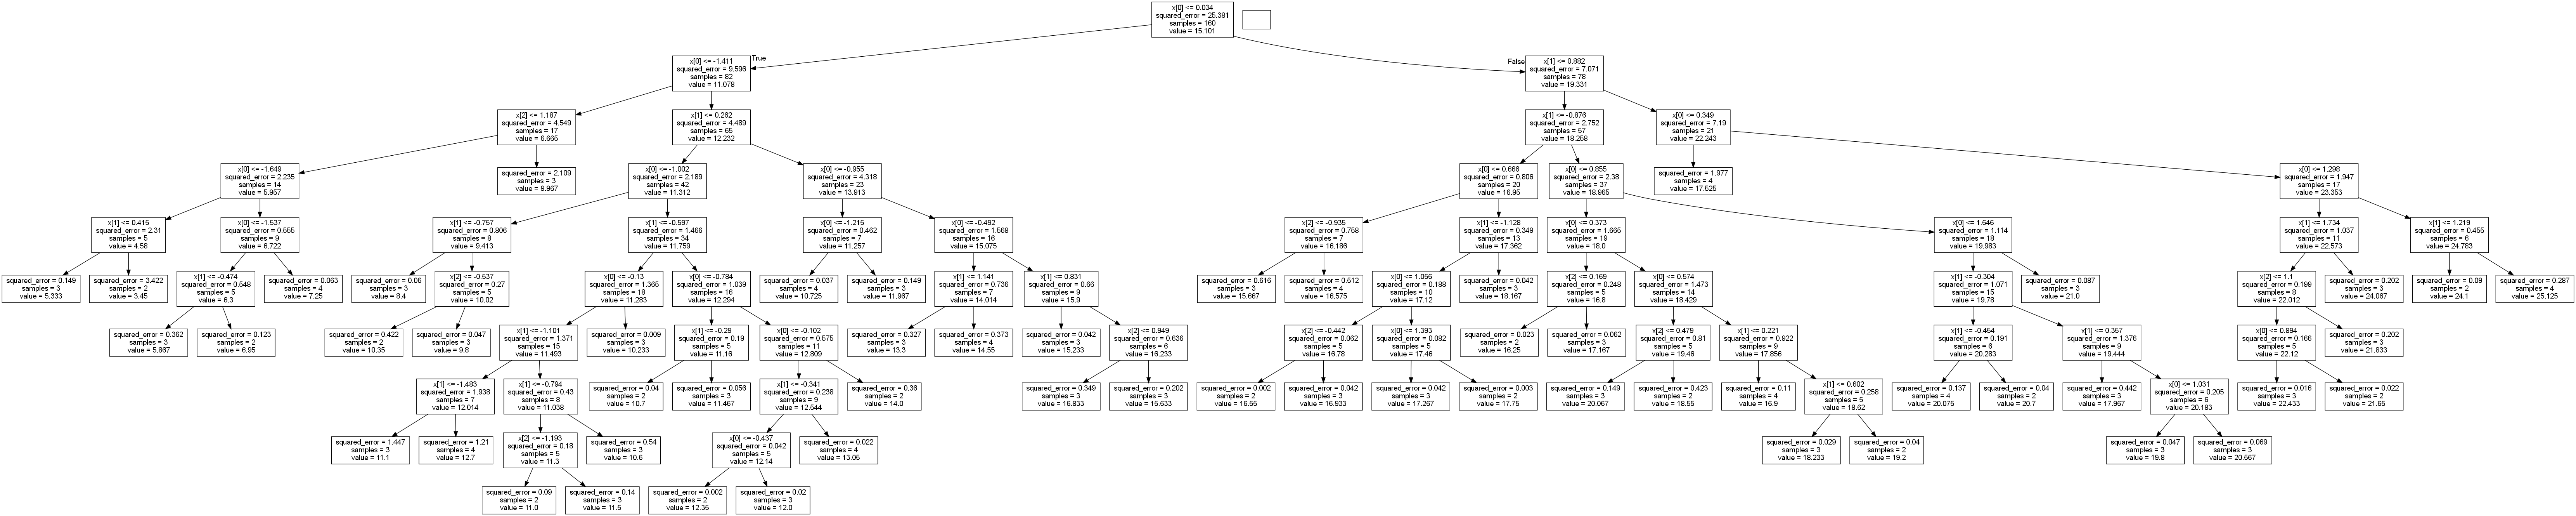

In [45]:
Image(graph.create_png())

## random forest

## training and testing

In [46]:
rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)


## metric evaluation

In [47]:
mae_rf = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test,y_pred_rf)
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)


MAE: 1.3890249999999988
MSE: 2.9946973749999932
RMSE: 1.730519394574933
R2 Score: 0.919835696762939


## optimising random forest using gridsearchCV

In [48]:
# Define parameter grid
param_grid = {
 'n_estimators': [50, 100, 200],
 'bootstrap': [True, False]
}
# Perform GridSearchCV
grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [50]:
print(grid.best_params_)

{'bootstrap': True, 'n_estimators': 200}


In [51]:
op_rf = RandomForestRegressor(n_estimators = grid.best_params_['n_estimators'],
 bootstrap=grid.best_params_['bootstrap'])
op_rf.fit(x_train_scaled, y_train)

RandomForestRegressor(n_estimators=200)

In [52]:
r2_rf_op = op_rf.score(x_test_scaled, y_test)
print('R2 Score: ', r2_rf_op)

R2 Score:  0.9177241420155765


## gradient boosting

## training and testing

In [53]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train_scaled, y_train)
y_pred_gb = gb.predict(x_test_scaled)

## metric evaluation

In [54]:
mae_gb = mean_absolute_error(y_test,y_pred_gb)
mse_gb = mean_squared_error(y_test,y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test,y_pred_gb)
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("R2 Score:", r2_gb)

MAE: 1.4380996667457973
MSE: 3.2309685547136113
RMSE: 1.79748951449337
R2 Score: 0.9135110127882383


## optimising gradient boosting using gridsearchCV

In [56]:
# Define parameter grid
param_grid = {
 'n_estimators': [50, 100, 200],
 'learning_rate': [0.01, 0.1, 0.2, 0.8, 0.9],
 'subsample': [0.8, 0.9, 1.0],
 'loss': ['ls', 'lad', 'huber']
}
# Perform GridSearchCV
grid = GridSearchCV(gb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.8, 0.9],
                         'loss': ['ls', 'lad', 'huber'],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='r2')

In [57]:
print(grid.best_params_)

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 50, 'subsample': 0.9}


In [58]:
op_gb = GradientBoostingRegressor(n_estimators = grid.best_params_['n_estimators'],
 learning_rate=grid.best_params_['learning_rate'],
 loss=grid.best_params_['loss'],
 subsample=grid.best_params_['subsample'])
op_gb.fit(x_train_scaled, y_train)


GradientBoostingRegressor(loss='huber', n_estimators=50, subsample=0.9)

In [59]:
r2_gb_op = op_gb.score(x_test_scaled, y_test)
print('R2 Score: ', r2_gb_op)

R2 Score:  0.910502656077729


## model comparison

In [60]:
R2_Score = [r2_dt, r2_dt_op, r2_gb, r2_gb_op, r2_knn, r2_knn_op, r2_lr, r2_rf, r2_rf_op]
Models = ["Decision Tree", "Decision Tree Optimized",
 "Gradient Boosting", "Gradient Boosting Optimized",
 "KNN", "KNN Optimized", "Linear Regression",
 "Random Forest", "Random Forest Optimized"]

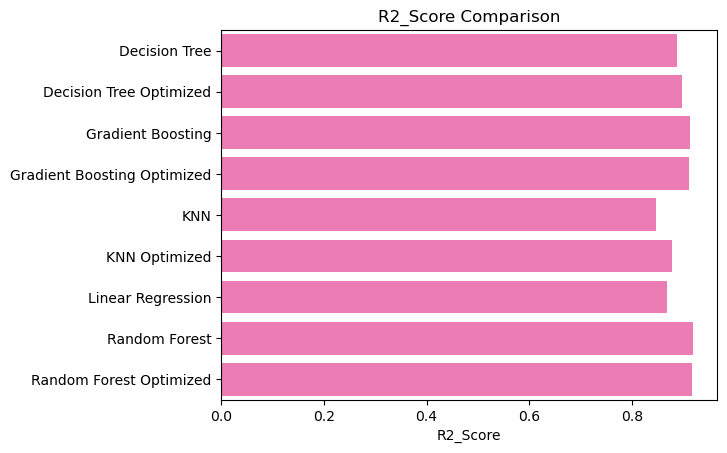

In [61]:
sn.barplot(x = R2_Score, y = Models, color = 'hotpink')
plt.xlabel("R2_Score")
plt.title("R2_Score Comparison")
plt.show()

## gradient boosting Vs random forest optimized

In [62]:
R2_Score = [r2_gb, r2_rf, r2_rf_op]
Models = ["Gradient Boosting", "Random Forest", "Random Forest Optimized"]

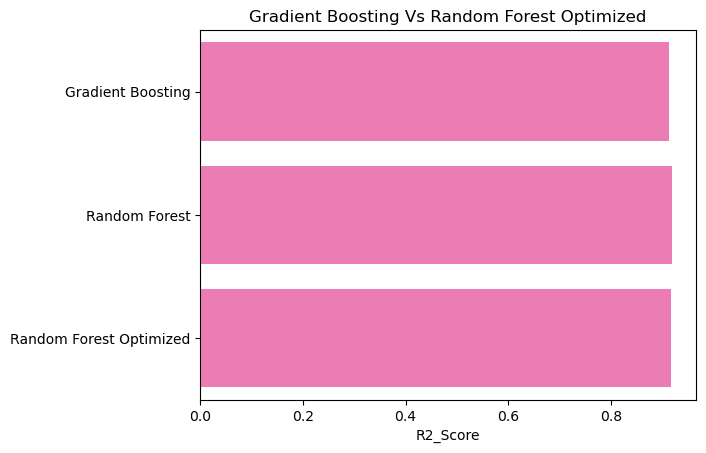

In [63]:
sn.barplot(x = R2_Score, y = Models, color = 'hotpink')
plt.xlabel("R2_Score")
plt.title("Gradient Boosting Vs Random Forest Optimized")
plt.show()

## conclusion

both gradient boost and random forest performed well on the data